# IPBMA_4:Visibility of a nodule inside a noisy image

### Author: Liu Cong and Ulloa Ferrer,Leonardo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
phantomsFncnc = os.path.join(sys.path[0], 'auxFiles', 'phantomsFnc.py')
IOFnc = os.path.join(sys.path[0], 'auxFiles', 'detectorFnc.py')

try:
    %run {auxFnc}
    %run {phantomsFncnc}
    %run {IOFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    phantomsFncnc = os.path.join('.', 'auxFiles', 'phantomsFnc.py')
    IOFnc = os.path.join('.', 'auxFiles', 'detectorFnc.py')
    %run {auxFnc}
    %run {phantomsFncnc}
    %run {IOFnc}



In [95]:
N0 = 4000000 # photons/mm2
n = 100 * 100 # number of points of the quantum image
pointSize = 0.1 # size of "each point" in the quantum image

#### Creating the image, based on uniform distribution of incident photons

In [96]:
imgData = createQuantumImage(N0, n, pointSize)

In [97]:
N1 = np.mean(imgData)
print(N1)

40000.00000000001


In [98]:
# insertNoduleQImage() -> Insert a nodule in the center of an homogeneous quantum image.
# noduleSize -> Ratio between the size of the nodule and the size of a point in the quantum image.
# noduleContrast -> Nodule contrast in %
noduleSize= 10
noduleContrast= 1 # Means 1%
imgNodule= insertNoduleQImage(imgData, noduleSize, noduleContrast)

#### show images

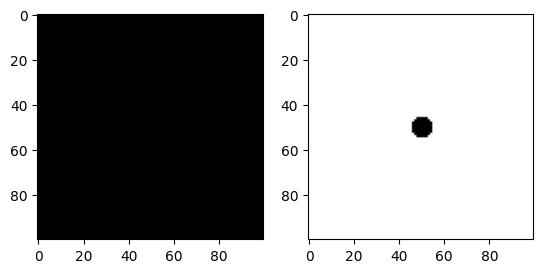

In [99]:
plt.subplot(121)
plt.imshow(imgData, cmap="gray")

plt.subplot(122)
plt.imshow(imgNodule, cmap="gray")
plt.show()

#### Plot of a line that crosses the image with the nodule at the center

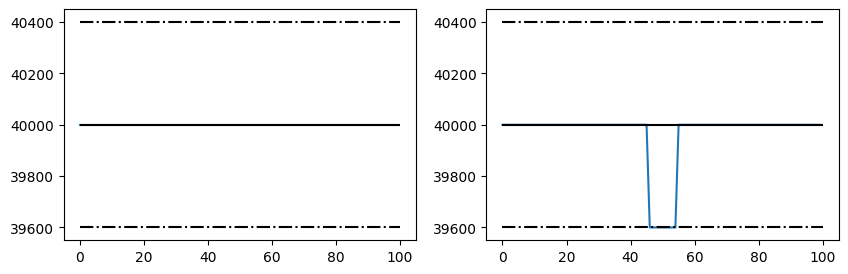

In [100]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plotMiddleLine(imgData, N1)

plt.subplot(122)
plotMiddleLine(imgNodule, N1)

#### Creating the noise image, based on the Poisson distribution

In [101]:
imgDataP= detectorNoiseP_1_1(imgData)

#### Creating the noise image, based on the Normal distribution

In [102]:
imgDataN = detectorNoiseN_1_1(imgData)

-0.018226097135009424
0.9960001485013182


In [103]:
print(f'{np.max(imgDataP):.1f}, {np.max(imgDataN):.1f}')
print(f'{np.min(imgDataP):.1f}, {np.min(imgDataN):.1f}')

40956.0, 40739.8
39258.0, 39222.5


#### Show the noise images

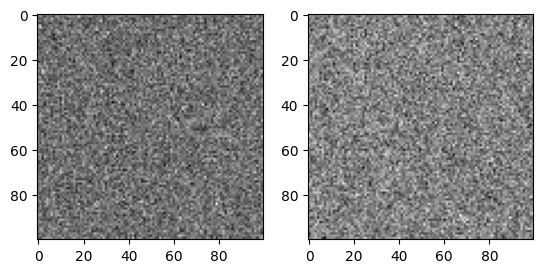

In [104]:
plt.subplot(121)
plt.imshow(imgDataP, cmap="gray")

plt.subplot(122)
plt.imshow(imgDataN, cmap="gray")
plt.show()

#### Plot of a line that crosses the image of the noise images at the center

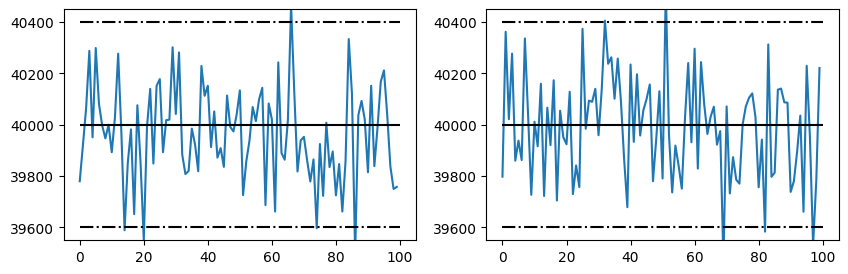

In [105]:
# The interval limits at 2*sigma where included in the plot

plt.figure(figsize=(10, 3))

plt.subplot(121)
plotMiddleLine(imgDataP, N1)

plt.subplot(122)
plotMiddleLine(imgDataN, N1)

#### Plot of the distribution of the detector cells in terms of the number of photons captured

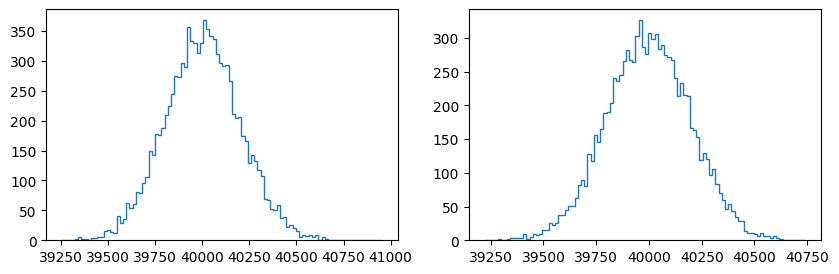

In [106]:
# We use a number of bins= 100, to build the histograms

plt.figure(figsize=(10, 3))

plt.subplot(121)
plotCellDistribution(imgDataP, 100)

plt.subplot(122)
plotCellDistribution(imgDataN, 100)

In [107]:
print(imgDataP.shape)

(100, 100)


#### Implementation of a noise image with a nodule superimposed in the center.

In [108]:
# Case 1

noduleSize= 10
noduleContrast= 0.25
imgNodule_1= insertNoduleQImage(imgData, noduleSize, noduleContrast)
imgNodule_1_P= detectorNoiseP_1_1(imgNodule_1)

#### Showing the noise image and the nodule image for comparison

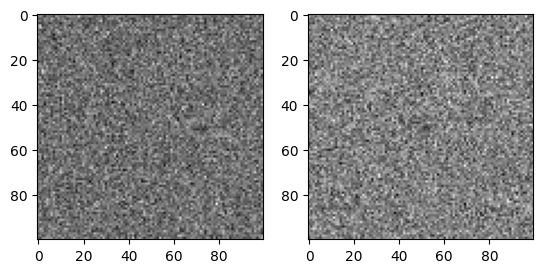

In [109]:
plt.subplot(121)
plt.imshow(imgDataP, cmap="gray")

plt.subplot(122)
plt.imshow(imgNodule_1_P, cmap="gray")
plt.show()

#### Plot a line across the image through its center

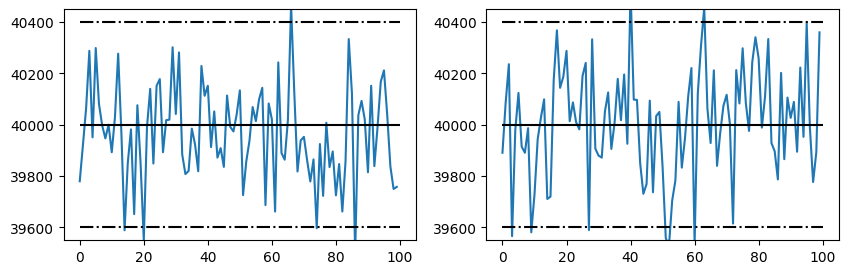

In [110]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plotMiddleLine(imgDataP, N1)

plt.subplot(122)
plotMiddleLine(imgNodule_1_P, N1)

In [111]:
# Case 2

noduleSize= 10
noduleContrast= 1

imgNodule_2= insertNoduleQImage(imgData, noduleSize, noduleContrast)
imgNodule_2_P= detectorNoiseP_1_1(imgNodule_2)

#### Showing the noise image and the nodule image for comparison

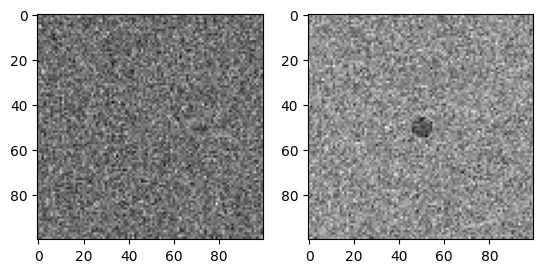

In [112]:
plt.subplot(121)
plt.imshow(imgDataP, cmap="gray")

plt.subplot(122)
plt.imshow(imgNodule_2_P, cmap="gray")
plt.show()

#### Plot a line across the image through its center

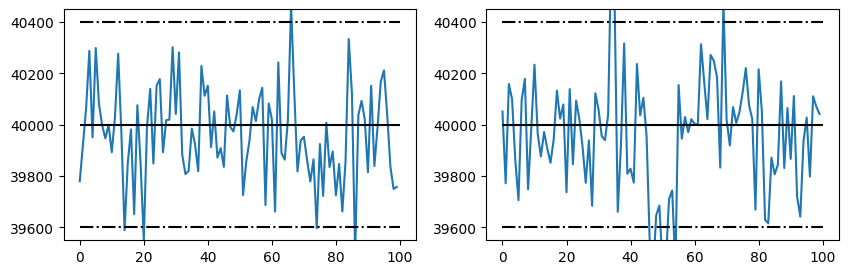

In [113]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plotMiddleLine(imgDataP, N1)

plt.subplot(122)
plotMiddleLine(imgNodule_2_P, N1)

In [114]:
# Case 3

noduleSize= 3
noduleContrast= 1

imgNodule_3= insertNoduleQImage(imgData, noduleSize, noduleContrast)
imgNodule_3_P= detectorNoiseP_1_1(imgNodule_3)

#### Showing the noise image and the nodule image for comparison

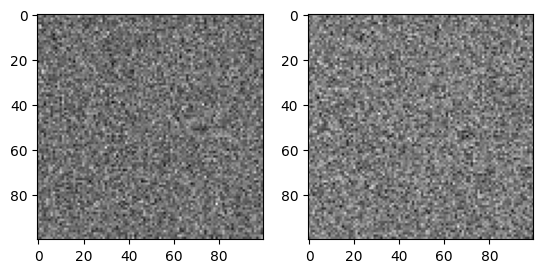

In [115]:
plt.subplot(121)
plt.imshow(imgDataP, cmap="gray")

plt.subplot(122)
plt.imshow(imgNodule_3_P, cmap="gray")
plt.show()

#### Plot of a line across the image through its center

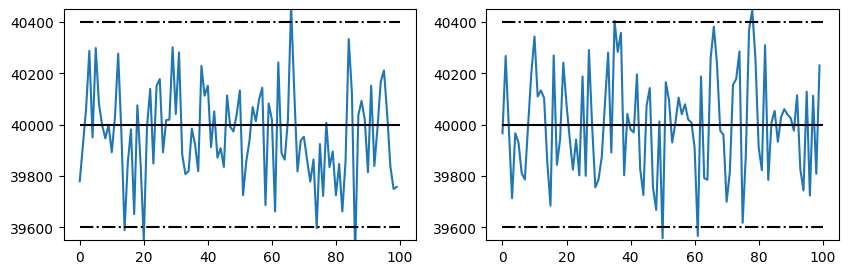

In [116]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plotMiddleLine(imgDataP, N1)

plt.subplot(122)
plotMiddleLine(imgNodule_3_P, N1)